In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [65]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
img_rows, img_cols = 28, 28

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train =X_train.astype('float32')
x_test = X_test.astype('float32')

In [69]:
print(X_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [0]:
# X => (X - Xmin)/(Xmax-Xmin) = X/255
#to normalize 

X_train = X_train/255
X_test = X_test/255

In [71]:
print(X_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [72]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 2 layers Kernel (3,3) : 

## Architecture 300-150 

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.1985 - acc: 0.9384 - val_loss: 0.0395 - val_acc: 0.9870
Epoch 2/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0759 - acc: 0.9771 - val_loss: 0.0364 - val_acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0607 - acc: 0.9825 - val_loss: 0.0314 - val_acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0493 - acc: 0.9848 - val_loss: 0.0324 - val_acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0421 - acc: 0.9874 - val_loss: 0.0290 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0374 - acc: 0.9885 - val_loss: 0.0200 - val_acc: 0.9944
Epoch 7/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.0334 - acc: 0.9899 - val_loss: 0.

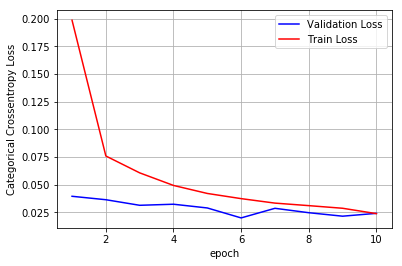

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

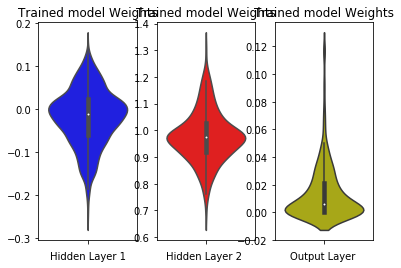

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.1825 - acc: 0.9426 - val_loss: 0.0392 - val_acc: 0.9873
Epoch 2/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0759 - acc: 0.9774 - val_loss: 0.0422 - val_acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0574 - acc: 0.9823 - val_loss: 0.0322 - val_acc: 0.9893
Epoch 4/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0471 - acc: 0.9861 - val_loss: 0.0247 - val_acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0406 - acc: 0.9874 - val_loss: 0.0245 - val_acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0244 - val_acc: 0.9925
Epoch 7/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0324 - acc: 0.9894 - val_loss: 0.

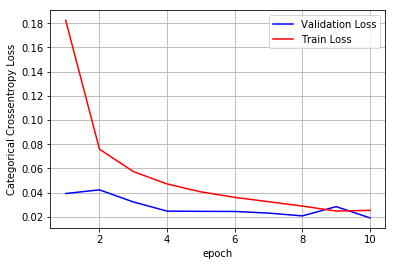

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

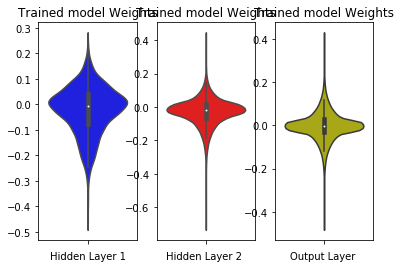

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [75]:
%matplotlib inline
!python -m rasa_nlu.evaluate -d  nlu.md -m <path to model>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `python -m rasa_nlu.evaluate -d  nlu.md -m <path to model>'


## With Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 12
from keras.layers.normalization import BatchNormalization


model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.25))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 294us/step - loss: 0.2176 - acc: 0.9362 - val_loss: 0.0452 - val_acc: 0.9862
Epoch 2/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.0975 - acc: 0.9720 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 3/12
60000/60000 [==============================] - 16s 260us/step - loss: 0.0751 - acc: 0.9777 - val_loss: 0.0339 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0660 - acc: 0.9812 - val_loss: 0.0378 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0576 - acc: 0.9830 - val_loss: 0.0271 - val_acc: 0.9914
Epoch 6/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0531 - acc: 0.9845 - val_loss: 0.0357 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0464 - acc: 0.9868 - val_loss: 0.

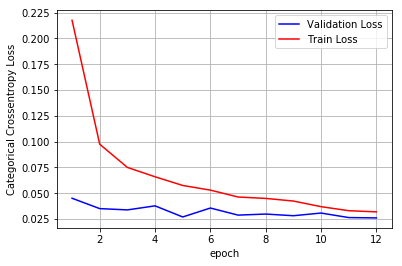

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

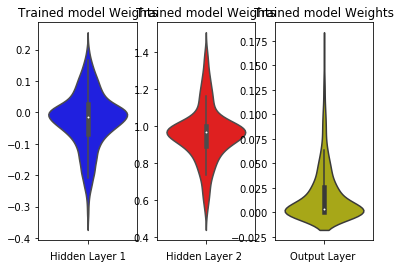

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 12
from keras.layers.normalization import BatchNormalization


model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.25))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))



model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 343us/step - loss: 0.2708 - acc: 0.9201 - val_loss: 0.0682 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.1229 - acc: 0.9652 - val_loss: 0.0479 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 18s 303us/step - loss: 0.0909 - acc: 0.9751 - val_loss: 0.0575 - val_acc: 0.9842
Epoch 4/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.0805 - acc: 0.9777 - val_loss: 0.0301 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 18s 302us/step - loss: 0.0678 - acc: 0.9815 - val_loss: 0.0330 - val_acc: 0.9905
Epoch 6/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.0639 - acc: 0.9818 - val_loss: 0.0415 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.0527 - acc: 0.9854 - val_loss: 0.

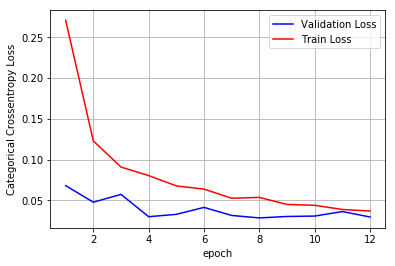

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

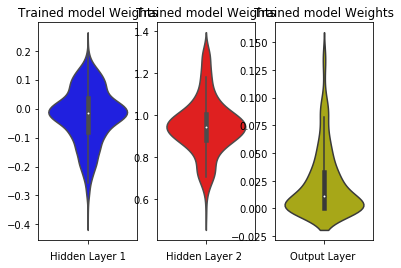

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Layers Kernel (3,3) :


## Architecture 512-264-132 

## With Padding, Batchnormalization and Dropout :

In [79]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(512,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(264, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(132, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1963 - acc: 0.9396 - val_loss: 0.0524 - val_acc: 0.9847
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0773 - acc: 0.9785 - val_loss: 0.0307 - val_acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0569 - acc: 0.9835 - val_loss: 0.0287 - val_acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0513 - acc: 0.9848 - val_loss: 0.0258 - val_acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0472 - acc: 0.9865 - val_loss: 0.0260 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0402 - acc: 0.9890 - val_loss: 0.0349 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0310 - val_acc

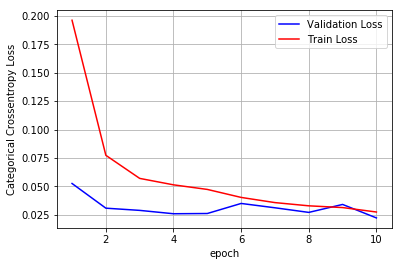

In [80]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

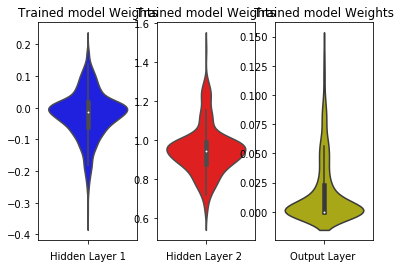

In [81]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Layers Kernel (3,3) :

## Architecture 400-350-150-75  

## With Padding, Batchnormalization and Dropout :

In [82]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(400,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(350, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



#model_.add(Conv2D(100, kernel_size=(7, 7),activation='relu',padding='same') )
#model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))


model_.add(Conv2D(75, kernel_size=(3, 3),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())


model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2179 - acc: 0.9340 - val_loss: 0.0391 - val_acc: 0.9881
Epoch 2/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0697 - acc: 0.9802 - val_loss: 0.0355 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0556 - acc: 0.9842 - val_loss: 0.0199 - val_acc: 0.9934
Epoch 4/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0451 - acc: 0.9868 - val_loss: 0.0217 - val_acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0391 - acc: 0.9888 - val_loss: 0.0264 - val_acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0375 - acc: 0.9897 - val_loss: 0.0188 - val_acc: 0.9941
Epoch 7/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0308 - acc: 0.9908 - val_loss: 0.0225 - val_acc

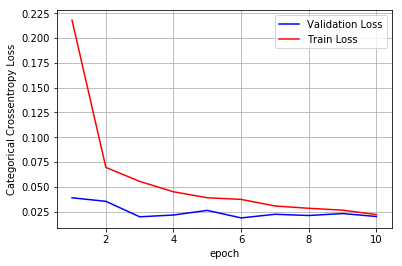

In [83]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

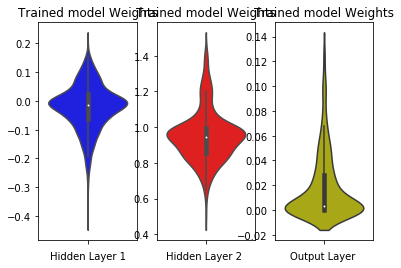

In [84]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 2 Layers Kernel (5,5) :

## Architecture 300-150

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.1895 - acc: 0.9417 - val_loss: 0.0318 - val_acc: 0.9892
Epoch 2/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0640 - acc: 0.9811 - val_loss: 0.0237 - val_acc: 0.9922
Epoch 3/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0470 - acc: 0.9867 - val_loss: 0.0255 - val_acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0391 - acc: 0.9884 - val_loss: 0.0236 - val_acc: 0.9933
Epoch 5/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0333 - acc: 0.9907 - val_loss: 0.0193 - val_acc: 0.9945
Epoch 6/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0280 - acc: 0.9914 - val_loss: 0.0235 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0265 - acc: 0.9922 - val_loss: 0.

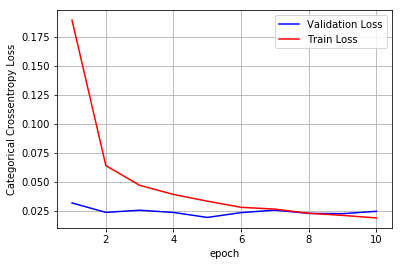

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

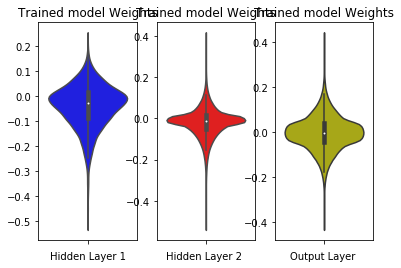

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),padding='same',activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.1842 - acc: 0.9433 - val_loss: 0.0474 - val_acc: 0.9844
Epoch 2/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.0681 - acc: 0.9804 - val_loss: 0.0307 - val_acc: 0.9905
Epoch 3/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0503 - acc: 0.9849 - val_loss: 0.0310 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0408 - acc: 0.9879 - val_loss: 0.0266 - val_acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0346 - acc: 0.9893 - val_loss: 0.0208 - val_acc: 0.9935
Epoch 6/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0214 - val_acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0255 - acc: 0.9924 - val_loss: 0.

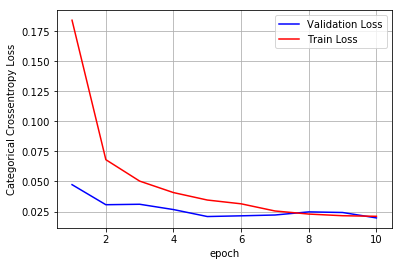

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

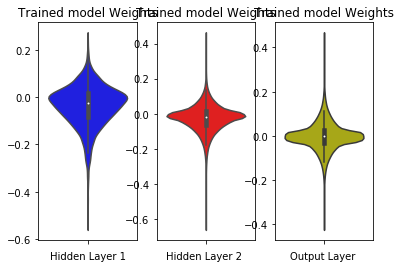

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 15



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),padding='same',activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 388us/step - loss: 0.2795 - acc: 0.9182 - val_loss: 0.0620 - val_acc: 0.9834
Epoch 2/15
60000/60000 [==============================] - 22s 362us/step - loss: 0.1084 - acc: 0.9710 - val_loss: 0.0369 - val_acc: 0.9892
Epoch 3/15
60000/60000 [==============================] - 22s 360us/step - loss: 0.0848 - acc: 0.9773 - val_loss: 0.0360 - val_acc: 0.9881
Epoch 4/15
60000/60000 [==============================] - 22s 360us/step - loss: 0.0668 - acc: 0.9818 - val_loss: 0.0322 - val_acc: 0.9904
Epoch 5/15
60000/60000 [==============================] - 22s 361us/step - loss: 0.0591 - acc: 0.9839 - val_loss: 0.0369 - val_acc: 0.9897
Epoch 6/15
60000/60000 [==============================] - 22s 361us/step - loss: 0.0534 - acc: 0.9854 - val_loss: 0.0363 - val_acc: 0.9893
Epoch 7/15
60000/60000 [==============================] - 22s 364us/step - loss: 0.0433 - acc: 0.9879 - val_loss: 0.

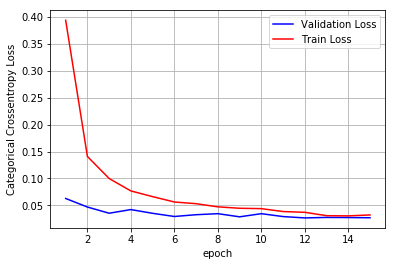

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

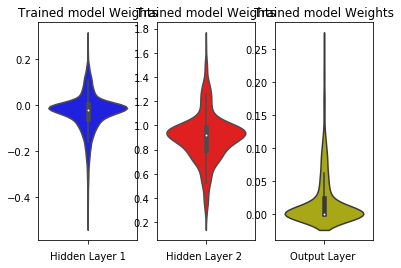

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 15



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 293us/step - loss: 0.1917 - acc: 0.9446 - val_loss: 0.0489 - val_acc: 0.9859
Epoch 2/15
60000/60000 [==============================] - 16s 268us/step - loss: 0.0849 - acc: 0.9765 - val_loss: 0.0432 - val_acc: 0.9875
Epoch 3/15
60000/60000 [==============================] - 16s 268us/step - loss: 0.0618 - acc: 0.9820 - val_loss: 0.0678 - val_acc: 0.9815
Epoch 4/15
60000/60000 [==============================] - 16s 268us/step - loss: 0.0538 - acc: 0.9848 - val_loss: 0.0311 - val_acc: 0.9906
Epoch 5/15
60000/60000 [==============================] - 16s 267us/step - loss: 0.0487 - acc: 0.9865 - val_loss: 0.0369 - val_acc: 0.9892
Epoch 6/15
60000/60000 [==============================] - 16s 267us/step - loss: 0.0402 - acc: 0.9888 - val_loss: 0.0366 - val_acc: 0.9891
Epoch 7/15
60000/60000 [==============================] - 16s 268us/step - loss: 0.0368 - acc: 0.9894 - val_loss: 0.

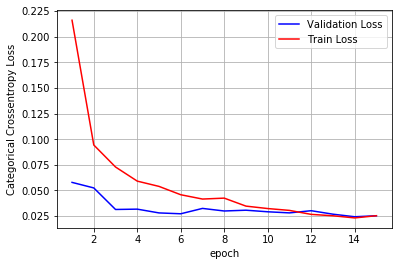

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

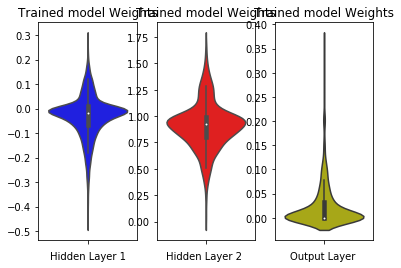

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Layers Kernel (5,5) :

## Architecture 512-264-132

## With Padding, Batchnormalization and Dropout :

In [85]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(512,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(264, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(132, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1970 - acc: 0.9405 - val_loss: 0.0489 - val_acc: 0.9842
Epoch 2/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0707 - acc: 0.9802 - val_loss: 0.0323 - val_acc: 0.9892
Epoch 3/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0552 - acc: 0.9850 - val_loss: 0.0235 - val_acc: 0.9925
Epoch 4/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0484 - acc: 0.9869 - val_loss: 0.0258 - val_acc: 0.9922
Epoch 5/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0398 - acc: 0.9889 - val_loss: 0.0269 - val_acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0330 - acc: 0.9905 - val_loss: 0.0293 - val_acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0314 - acc: 0.9911 - val_loss: 0.0335 - val_acc

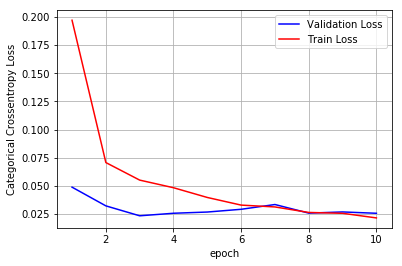

In [86]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

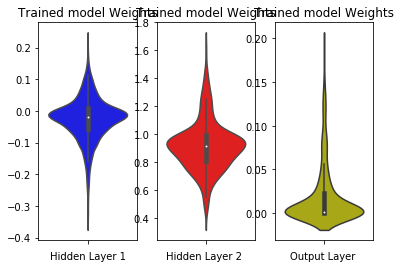

In [87]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Layers Kernel (5,5) :

## Architecture 400-350-150-75  

## With Padding, Batchnormalization and Dropout :

In [88]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(400,kernel_size=(5, 5), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(350, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



#model_.add(Conv2D(100, kernel_size=(7, 7),activation='relu',padding='same') )
#model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))


model_.add(Conv2D(75, kernel_size=(5, 5),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())


model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1737 - acc: 0.9485 - val_loss: 0.0766 - val_acc: 0.9760
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0588 - acc: 0.9831 - val_loss: 0.0320 - val_acc: 0.9899
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0492 - acc: 0.9867 - val_loss: 0.0279 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0387 - acc: 0.9891 - val_loss: 0.0223 - val_acc: 0.9934
Epoch 5/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0327 - acc: 0.9905 - val_loss: 0.0310 - val_acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0290 - acc: 0.9916 - val_loss: 0.0305 - val_acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0265 - acc: 0.9928 - val_loss: 0.0407 - val_ac

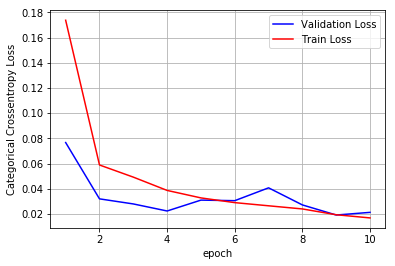

In [89]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

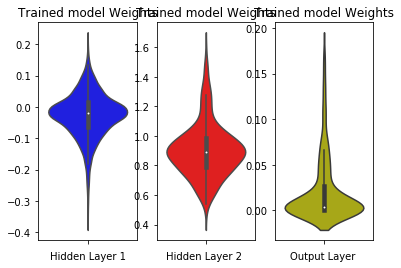

In [90]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 2 Layers Kernel (7,7) :

## Architecture 300-150

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 6



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 17s 288us/step - loss: 0.1883 - acc: 0.9427 - val_loss: 0.0409 - val_acc: 0.9883
Epoch 2/6
60000/60000 [==============================] - 16s 263us/step - loss: 0.0649 - acc: 0.9816 - val_loss: 0.0347 - val_acc: 0.9892
Epoch 3/6
60000/60000 [==============================] - 16s 265us/step - loss: 0.0464 - acc: 0.9867 - val_loss: 0.0275 - val_acc: 0.9906
Epoch 4/6
60000/60000 [==============================] - 16s 266us/step - loss: 0.0369 - acc: 0.9889 - val_loss: 0.0255 - val_acc: 0.9925
Epoch 5/6
60000/60000 [==============================] - 16s 264us/step - loss: 0.0301 - acc: 0.9913 - val_loss: 0.0312 - val_acc: 0.9921
Epoch 6/6
60000/60000 [==============================] - 16s 267us/step - loss: 0.0272 - acc: 0.9920 - val_loss: 0.0289 - val_acc: 0.9915
Test loss: 0.028939694792542606
Test accuracy: 0.9915


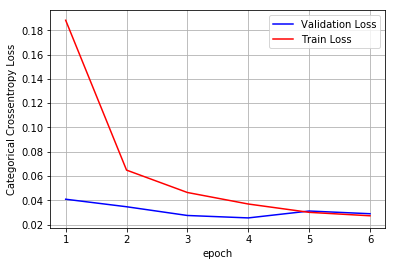

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

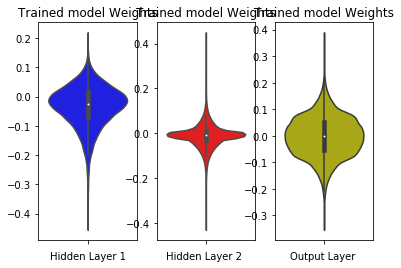

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 6



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),padding='same',activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 31s 525us/step - loss: 0.1838 - acc: 0.9448 - val_loss: 0.0373 - val_acc: 0.9881
Epoch 2/6
60000/60000 [==============================] - 30s 500us/step - loss: 0.0650 - acc: 0.9819 - val_loss: 0.0386 - val_acc: 0.9861
Epoch 3/6
60000/60000 [==============================] - 30s 505us/step - loss: 0.0480 - acc: 0.9859 - val_loss: 0.0197 - val_acc: 0.9927
Epoch 4/6
60000/60000 [==============================] - 30s 506us/step - loss: 0.0383 - acc: 0.9895 - val_loss: 0.0292 - val_acc: 0.9908
Epoch 5/6
60000/60000 [==============================] - 30s 505us/step - loss: 0.0334 - acc: 0.9902 - val_loss: 0.0212 - val_acc: 0.9932
Epoch 6/6
60000/60000 [==============================] - 30s 505us/step - loss: 0.0270 - acc: 0.9920 - val_loss: 0.0226 - val_acc: 0.9933
Test loss: 0.02260605999913064
Test accuracy: 0.9933


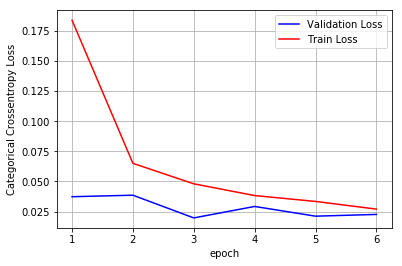

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

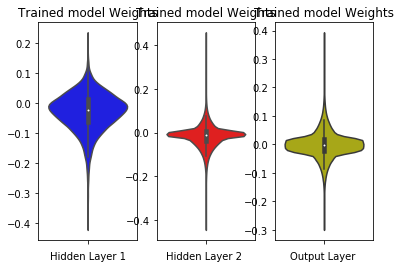

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.1740 - acc: 0.9475 - val_loss: 0.0474 - val_acc: 0.9865
Epoch 2/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0713 - acc: 0.9791 - val_loss: 0.0330 - val_acc: 0.9889
Epoch 3/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0515 - acc: 0.9847 - val_loss: 0.0326 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0510 - acc: 0.9852 - val_loss: 0.0465 - val_acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.0384 - acc: 0.9890 - val_loss: 0.0408 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0366 - acc: 0.9895 - val_loss: 0.0286 - val_acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0340 - acc: 0.9899 - val_loss: 0.

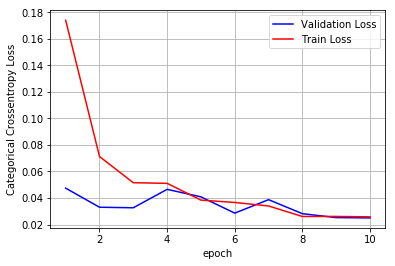

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

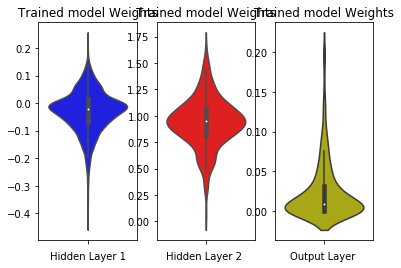

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



batch_size = 60 
nb_epoch = 15



model_ = Sequential()
model_.add(Conv2D(300,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 36s 606us/step - loss: 0.2951 - acc: 0.9150 - val_loss: 0.0550 - val_acc: 0.9847
Epoch 2/15
60000/60000 [==============================] - 34s 566us/step - loss: 0.1171 - acc: 0.9698 - val_loss: 0.0435 - val_acc: 0.9878
Epoch 3/15
60000/60000 [==============================] - 34s 571us/step - loss: 0.0795 - acc: 0.9789 - val_loss: 0.0312 - val_acc: 0.9921
Epoch 4/15
60000/60000 [==============================] - 35s 575us/step - loss: 0.0645 - acc: 0.9826 - val_loss: 0.0284 - val_acc: 0.9916
Epoch 5/15
60000/60000 [==============================] - 35s 578us/step - loss: 0.0566 - acc: 0.9853 - val_loss: 0.0241 - val_acc: 0.9936
Epoch 6/15
60000/60000 [==============================] - 35s 579us/step - loss: 0.0507 - acc: 0.9866 - val_loss: 0.0260 - val_acc: 0.9921
Epoch 7/15
60000/60000 [==============================] - 35s 577us/step - loss: 0.0427 - acc: 0.9887 - val_loss: 0.

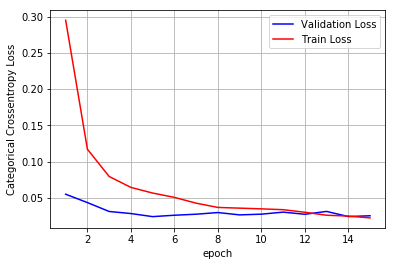

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

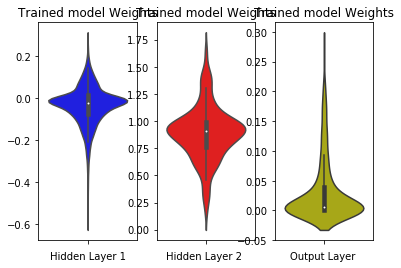

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Layers Kernel (7,7) :

## Architecture 512-264-132

## With Padding, Batchnormalization and Dropout :

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(512,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(264, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(132, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
#model_.add(Dropout(0.2))





model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.2050 - acc: 0.9390 - val_loss: 0.0529 - val_acc: 0.9848
Epoch 2/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0715 - acc: 0.9799 - val_loss: 0.0331 - val_acc: 0.9897
Epoch 3/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0532 - acc: 0.9853 - val_loss: 0.1877 - val_acc: 0.9558
Epoch 4/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0452 - acc: 0.9871 - val_loss: 0.0406 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0429 - acc: 0.9884 - val_loss: 0.0315 - val_acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0331 - acc: 0.9909 - val_loss: 0.0341 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0314 - acc: 0.9916 - val_loss: 0.0313 - 

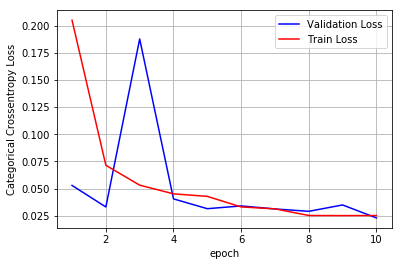

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

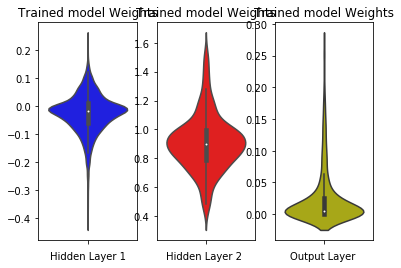

In [0]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4 Layers Kernel (7,7) :

## Architecture 400-350-150-75

## With Padding, Batchnormalization and Dropout :

In [76]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size = 60 
nb_epoch = 10



model_ = Sequential()
model_.add(Conv2D(400,kernel_size=(7, 7), activation='relu',padding='same', input_shape=input_shape))
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(350, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))




model_.add(Conv2D(150, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())
model_.add(Dropout(0.2))



#model_.add(Conv2D(100, kernel_size=(7, 7),activation='relu',padding='same') )
#model_.add(MaxPooling2D(pool_size=(2, 2)))
#model_.add(BatchNormalization())
#model_.add(Dropout(0.2))


model_.add(Conv2D(75, kernel_size=(7, 7),activation='relu',padding='same') )
model_.add(MaxPooling2D(pool_size=(2, 2)))
model_.add(BatchNormalization())


model_.add(Dropout(0.25))
model_.add(Flatten())
model_.add(Dense(128, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(10, activation='softmax'))



model_.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



history=model_.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test, y_test))
score = model_.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.1850 - acc: 0.9453 - val_loss: 0.0745 - val_acc: 0.9769
Epoch 2/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0620 - acc: 0.9830 - val_loss: 0.0339 - val_acc: 0.9903
Epoch 3/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0453 - acc: 0.9872 - val_loss: 0.0257 - val_acc: 0.9923
Epoch 4/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0371 - acc: 0.9898 - val_loss: 0.0255 - val_acc: 0.9927
Epoch 5/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0312 - acc: 0.9914 - val_loss: 0.0385 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0285 - acc: 0.9925 - val_loss: 0.0309 - val_acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0255 - acc: 0.9925 - val_loss: 0.0301 - 

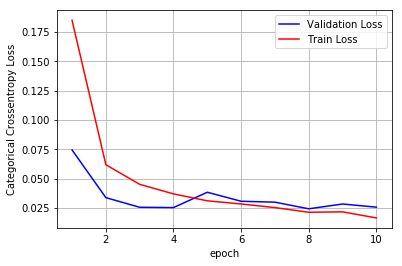

In [77]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

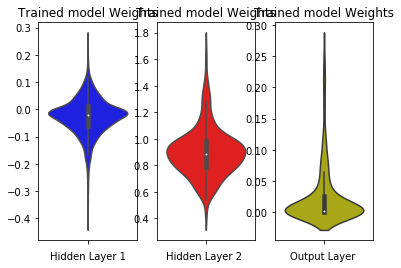

In [78]:
import seaborn as sns
w_after = model_.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusions : 

In [45]:
from prettytable import PrettyTable
    
x = PrettyTable(["Kernel", "No of Layers", "Methods","Test Accuracy"])
x.align["Kernel"] = "l"
x.align["Methods"] = "l"
x.align["No of Layers"] = "l"
x.align["Test Accuracy"] = "l"
x.add_row(["(3,3)"," 2 Layers (300-150) \n\n\n\n\n 3 Layers (512-264-132)\n\n\n 4 Layers (400-350-150-75)\n\n\n\n -----------------","1] Normal\n2] Padding\n3] BatchNormalization + Dropout\n4] Padding + BatchNormalization + Dropout\n\n1] Padding + BatchNormalization + Dropout\n\n\n1] Padding + BatchNormalization + Dropout","99.32\n99.39\n99.28\n99.25\n\n99.36\n\n\n99.4"])
x.add_row(["(5,5)"," 2 Layers (300-150) \n\n\n\n\n 3 Layers (512-264-132)\n\n\n 4 Layers (400-350-150-75)\n\n\n\n -----------------","1] Normal\n2] Padding\n3] BatchNormalization + Dropout\n4] Padding + BatchNormalization + Dropout\n\n1] Padding + BatchNormalization + Dropout\n\n\n1] Padding + BatchNormalization + Dropout","99.41\n99.4\n99.39\n99.4\n\n99.44\n\n\n99.43"])
x.add_row(["(7,7)"," 2 Layers (300-150) \n\n\n\n\n 3 Layers (512-264-132)\n\n\n 4 Layers (400-350-150-75)\n\n\n\n -----------------","1] Normal\n2] Padding\n3] BatchNormalization + Dropout\n4] Padding + BatchNormalization + Dropout\n\n1] Padding + BatchNormalization + Dropout\n\n\n1] Padding + BatchNormalization + Dropout","99.15\n99.33\n99.34\n99.44\n\n99.36\n\n\n99.25"])

print(x.get_string(title="LSTM WITH DIFFERENT KERNELS"))

+-------------------------------------------------------------------------------------------------+
|                                   LSTM WITH DIFFERENT KERNELS                                   |
+--------+----------------------------+-------------------------------------------+---------------+
| Kernel | No of Layers               | Methods                                   | Test Accuracy |
+--------+----------------------------+-------------------------------------------+---------------+
| (3,3)  |  2 Layers (300-150)        | 1] Normal                                 | 99.32         |
|        |                            | 2] Padding                                | 99.39         |
|        |                            | 3] BatchNormalization + Dropout           | 99.28         |
|        |                            | 4] Padding + BatchNormalization + Dropout | 99.25         |
|        |                            |                                           |               |


1] Kernel (5,5) performs better than other two kernels in my architecture.<br>
2] We got max Test Accuracy of 99.44 when we apply padding+batchnormalization + dropout on kernel (5,5) with 3 LSTM layers and on kernel(7,7) with 2 LSTM  layers <br>
3]Most of test Accuracy is greater than 99.30 <br>